###  Reuters corpus topic classification

This project is about topic classification on the Reuters corpus. It is multi-label classification: there can be more than one topics associated with each document.

#### Data

Test data will be extracted from XML-documents, taking input from <headline></headline> and <text></text>, target classes from <codes class = 'bip:topics:1.0'><code code = "topic_i"></code></codes>

input: 'document text string, each row a document'
target: ['topic_1', '...', 'topic_n'] = [0, ...., 1, 0]


There are 126 topics that are listed in the topic_codes.txt.


In [2]:
import pandas as pd
import numpy as np

In [174]:
topics = pd.read_csv('mock-data/topic_codes.txt', delimiter='\t')
topics

,CODE,DESCRIPTION
0,1POL,CURRENT NEWS - POLITICS
1,2ECO,CURRENT NEWS - ECONOMICS
2,3SPO,CURRENT NEWS - SPORT
3,4GEN,CURRENT NEWS - GENERAL
4,6INS,CURRENT NEWS - INSURANCE
...,...,...
121,M142,METALS TRADING
122,M143,ENERGY MARKETS
123,MCAT,MARKETS
124,MEUR,EURO CURRENCY


In [15]:
codes = topics['CODE']
codes

0       1POL
1       2ECO
2       3SPO
3       4GEN
4       6INS
       ...  
121     M142
122     M143
123     MCAT
124     MEUR
125    PRB13
Name: CODE, Length: 126, dtype: object

### Exploring code combination distribution

Now there is the actual data in a csv file, let's do some analysis on it.

Five of the code combinations are quite common, there are 20 000 -10 000 examples for them.

Half of the combinations however have only one example.


In [3]:
trunc_large_data_strings = pd.read_csv('reuters-csv/inputs_trunc.csv', delimiter=';')

In [140]:
trunc_large_data_strings.describe

<bound method NDFrame.describe of                                                      text  \
0       Official Journal contents - OJ C 169 of June 4...   
1       Official Journal contents - OJ L 144 of June 4...   
2       Suncor lowers Canada heavy oil price. COMPANY ...   
3       Suncor cuts Canada light oil prices. COMPANY E...   
4       Toronto stocks end softer, more consolidation ...   
...                                                   ...   
299768  Reuters French Advertising & Media Digest -Jul...   
299769  Fleming issues buy recommendation on M6. Flemi...   
299770  China to launch Internet service for science d...   
299771  Reuters German Advertising & Media Digest -Jul...   
299772  Singapore Internet gets boost from television ...   

                                                   target  \
0       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   
1       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   
2       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [141]:
code_freqs = trunc_large_data_strings['codes'].value_counts()
code_freqs

['C15', 'C151', 'CCAT']                                     22203
['C15', 'C152', 'CCAT']                                     19751
['M11', 'MCAT']                                             15791
['M14', 'M141', 'MCAT']                                     14675
['GCAT', 'GSPO']                                            12390
                                                            ...  
['C12', 'C13', 'CCAT', 'GCAT', 'GCRIM', 'GENV', 'GPOL']         1
['C13', 'CCAT', 'E12', 'ECAT', 'GCAT', 'GODD']                  1
['C13', 'C17', 'C171', 'C18', 'C183', 'C34', 'CCAT']            1
['C15', 'C152', 'C31', 'CCAT', 'GCAT', 'GENT']                  1
['E51', 'E512', 'ECAT', 'GCAT', 'GCRIM', 'GDEF', 'GPOL']        1
Name: codes, Length: 8326, dtype: int64

In [146]:
# these are more frecuent
code_freq_df = code_freqs.to_frame()
code_freq_df

,codes
"['C15', 'C151', 'CCAT']",22203
"['C15', 'C152', 'CCAT']",19751
"['M11', 'MCAT']",15791
"['M14', 'M141', 'MCAT']",14675
"['GCAT', 'GSPO']",12390
...,...
"['C12', 'C13', 'CCAT', 'GCAT', 'GCRIM', 'GENV', 'GPOL']",1
"['C13', 'CCAT', 'E12', 'ECAT', 'GCAT', 'GODD']",1
"['C13', 'C17', 'C171', 'C18', 'C183', 'C34', 'CCAT']",1
"['C15', 'C152', 'C31', 'CCAT', 'GCAT', 'GENT']",1


In [147]:
frequent_combos = code_freq_df[code_freq_df['codes']>10000]
frequent_combos

,codes
"['C15', 'C151', 'CCAT']",22203
"['C15', 'C152', 'CCAT']",19751
"['M11', 'MCAT']",15791
"['M14', 'M141', 'MCAT']",14675
"['GCAT', 'GSPO']",12390


In [148]:
rare_combos = code_freq_df[code_freq_df['codes']<10]
rare_combos

,codes
"['C13', 'C17', 'C173', 'CCAT']",9
"['M11', 'M13', 'M131', 'M132', 'MCAT']",9
"['E41', 'ECAT', 'GCAT', 'GCRIM', 'GJOB', 'GPOL']",9
"['GCAT', 'GFAS', 'GOBIT', 'GPRO']",9
"['C11', 'C18', 'C181', 'C182', 'CCAT']",9
...,...
"['C12', 'C13', 'CCAT', 'GCAT', 'GCRIM', 'GENV', 'GPOL']",1
"['C13', 'CCAT', 'E12', 'ECAT', 'GCAT', 'GODD']",1
"['C13', 'C17', 'C171', 'C18', 'C183', 'C34', 'CCAT']",1
"['C15', 'C152', 'C31', 'CCAT', 'GCAT', 'GENT']",1


In [150]:
code_freq_df[code_freq_df['codes']==1]

,codes
"['E12', 'GPOL', 'GVOTE', 'M132']",1
"['C11', 'C15', 'C152', 'C17', 'C171', 'C41', 'C411', 'CCAT']",1
"['C24', 'CCAT', 'GCAT', 'GDEF', 'GSCI']",1
"['C13', 'C15', 'CCAT', 'G15', 'G152', 'GCAT']",1
"['C11', 'C13', 'C18', 'C181', 'C34', 'CCAT', 'G15', 'G152', 'G157', 'GCAT']",1
...,...
"['C12', 'C13', 'CCAT', 'GCAT', 'GCRIM', 'GENV', 'GPOL']",1
"['C13', 'CCAT', 'E12', 'ECAT', 'GCAT', 'GODD']",1
"['C13', 'C17', 'C171', 'C18', 'C183', 'C34', 'CCAT']",1
"['C15', 'C152', 'C31', 'CCAT', 'GCAT', 'GENT']",1


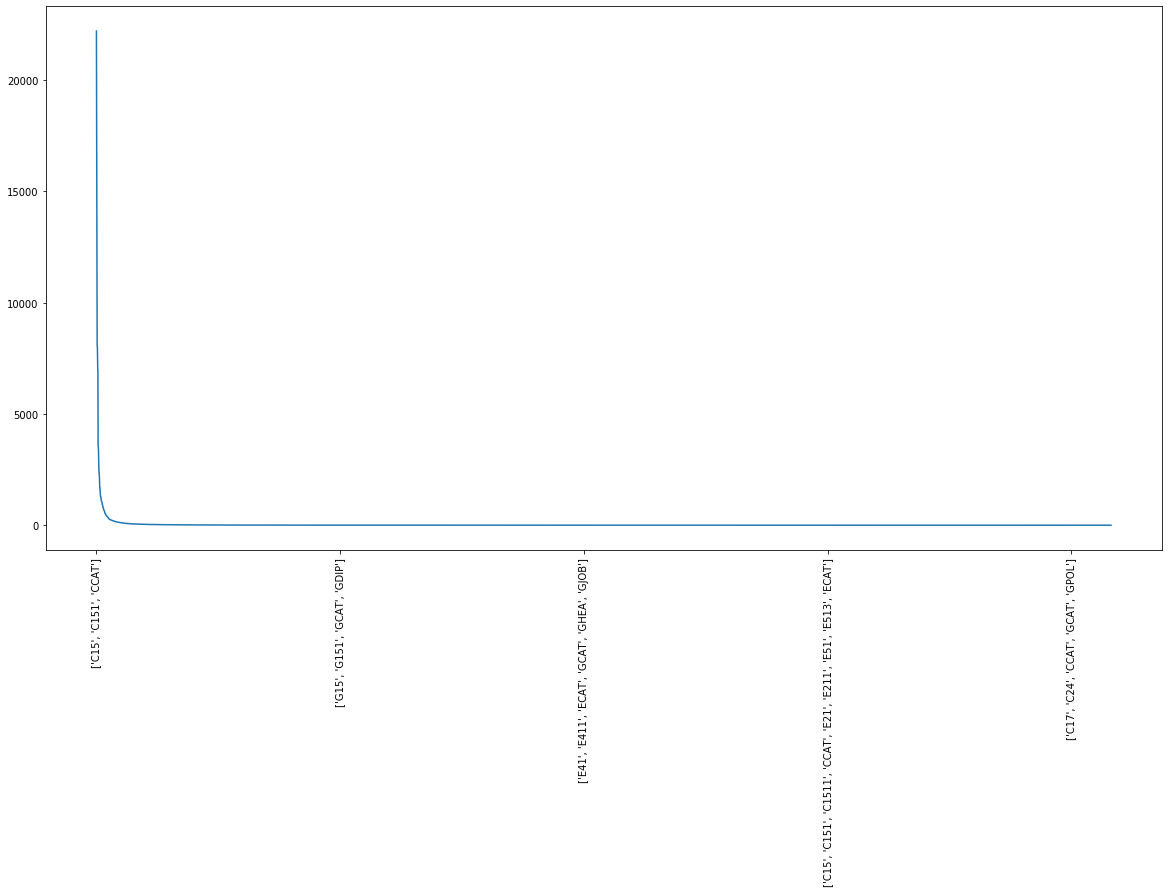

In [135]:
import matplotlib.pyplot as plt

code_freqs.plot(figsize=(20,10), rot=90)

In [4]:
#  because of the target and codes are stored as strings and not as list, I will convert them back to lists
trunc_large_data = trunc_large_data_strings.copy(deep=True)
trunc_large_data['target'] = trunc_large_data['target'].apply(eval)
trunc_large_data['codes'] = trunc_large_data['codes'].apply(eval)

In [162]:
trunc_large_data['codes']

0               [G15, GCAT]
1               [G15, GCAT]
2         [M14, M143, MCAT]
3         [M14, M143, MCAT]
4               [M11, MCAT]
                ...        
299768          [C32, CCAT]
299769               [C152]
299770         [GCAT, GSCI]
299771          [C32, CCAT]
299772          [C22, CCAT]
Name: codes, Length: 299773, dtype: object

In [15]:
# function to explore the amounts of single codes, return a sorted dictionary

def code_amount_check(data):
    codes_amount_dict = {}
    for index, code_list in data['codes'].iteritems():
        for code in code_list:
            if codes_amount_dict.get(code) == None:
                codes_amount_dict[code] = 1
            else: 
                codes_amount_dict[code] += 1
                
    sorted_code_amounts = dict(sorted(codes_amount_dict.items(), key=lambda item: item[1]))            
    return sorted_code_amounts          

In [173]:
large_trunc_codes_amount_dict = code_amount_check(trunc_large_data)
large_trunc_codes_amount_dict

{'GMIL': 4,
 'G159': 8,
 'E312': 19,
 'E313': 38,
 'G156': 55,
 'E142': 70,
 'E61': 122,
 'GFAS': 141,
 'E141': 162,
 'GTOUR': 187,
 'GOBIT': 301,
 'E132': 348,
 'C313': 381,
 'C331': 401,
 'E143': 432,
 'C16': 591,
 'E311': 619,
 'GWELF': 664,
 'G152': 671,
 'G155': 704,
 'E121': 747,
 'E411': 760,
 'G153': 761,
 'E14': 778,
 'G157': 801,
 'E31': 857,
 'C32': 919,
 'E511': 949,
 'C23': 958,
 'GODD': 975,
 'GSCI': 989,
 'GREL': 989,
 'E513': 1019,
 'C173': 1043,
 'G151': 1101,
 'GENT': 1310,
 'C174': 1358,
 'C311': 1423,
 'G158': 1479,
 'GPRO': 1560,
 'C182': 1658,
 'GWEA': 1675,
 'C34': 1843,
 'C22': 1890,
 'E71': 1892,
 'E131': 2011,
 'GHEA': 2111,
 'C312': 2153,
 'E13': 2280,
 'GENV': 2429,
 'C183': 2708,
 'C14': 2770,
 'E11': 2971,
 'G154': 3177,
 'GDEF': 3245,
 'GDIS': 3393,
 'C411': 3682,
 'C42': 3794,
 'C41': 4089,
 'GVOTE': 4222,
 'E512': 4251,
 'C172': 4254,
 'C12': 4693,
 'M142': 4996,
 'C33': 5383,
 'E41': 5693,
 'GJOB': 5759,
 'E211': 6244,
 'C171': 6565,
 'G15': 6731,
 'E5

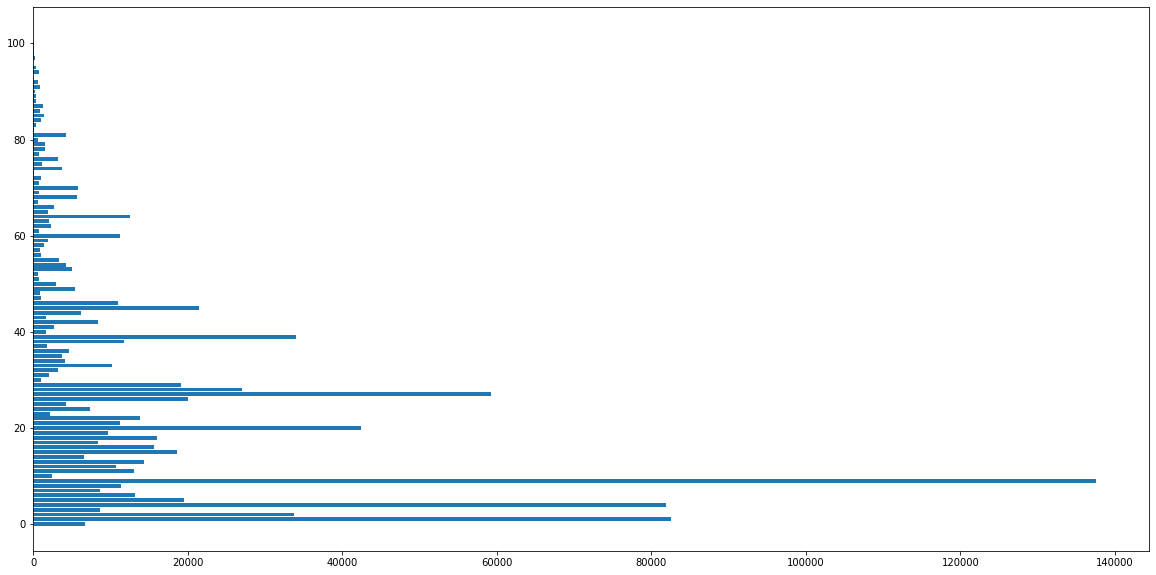

In [171]:
plt.barh(range(len(codes_amount_dict)), codes_amount_dict.values())
plt.rcParams["figure.figsize"] = (20,10)
plt.show()

### Trying out transformer and BERT

Next I will be trying out things presented in a blog post: [Transformers for Multi-Label Classification made simple.](https://towardsdatascience.com/transformers-for-multilabel-classification-71a1a0daf5e1)

I will also utilize some code from the home exercises of Deep Learning course.

In [17]:
import torch
import torch.nn as nn
from transformers import *

device = 'cuda' if torch.cuda.is_available() else 'cpu'

/home/hdheli/anaconda3/lib/python3.7/site-packages/torchaudio/backend/utils.py:54: UserWarning: "sox" backend is being deprecated. The default backend will be changed to "sox_io" backend in 0.8.0 and "sox" backend will be removed in 0.9.0. Please migrate to "sox_io" backend. Please refer to https://github.com/pytorch/audio/issues/903 for the detail.
  '"sox" backend is being deprecated. '
/home/hdheli/anaconda3/lib/python3.7/site-packages/torch/cuda/__init__.py:52: UserWarning: CUDA initialization: Found no NVIDIA driver on your system. Please check that you have an NVIDIA GPU and installed a driver from http://www.nvidia.com/Download/index.aspx (Triggered internally at  /pytorch/c10/cuda/CUDAFunctions.cpp:100.)
  return torch._C._cuda_getDeviceCount() > 0


In [24]:
# data to lists

documents = list(trunc_large_data.text.values)
labels = list(trunc_large_data.target.values)

In [25]:
doc_max_length = 256 # using the truncated mini train set sequence length
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased', do_lower_case=True) 

# encodings

encodings = tokenizer.batch_encode_plus(documents,max_length=doc_max_length,pad_to_max_length=True, truncation=True) # tokenizer's encoding method
input_ids = encodings['input_ids'] # tokenized and encoded sentences
token_type_ids = encodings['token_type_ids'] # token type ids
attention_masks = encodings['attention_mask'] # attention masks

In [29]:
# take rows that have too rare targets

label_counts = trunc_large_data.target.astype(str).value_counts()
one_freq = label_counts[label_counts==1].keys()
one_freq_idxs = sorted(list(trunc_large_data[trunc_large_data.target.astype(str).isin(one_freq)].index), reverse=True)
print('df label indices with only one instance: ', one_freq_idxs)

df label indices with only one instance:  [299717, 299532, 299397, 299374, 299343, 299294, 299273, 299259, 299248, 299131, 299128, 299095, 298953, 298663, 298641, 298602, 298327, 298321, 298314, 298312, 298301, 298294, 298280, 298271, 298252, 298241, 298151, 298088, 298084, 298073, 298069, 298018, 297944, 297752, 297677, 297673, 297458, 297422, 297374, 297355, 297263, 297237, 297142, 297102, 297099, 297019, 296887, 296879, 296836, 296825, 296783, 296667, 296493, 296483, 296291, 296183, 296031, 295950, 295943, 295875, 295861, 295819, 295813, 295804, 295712, 295710, 295648, 295597, 295591, 295351, 295191, 295114, 295035, 295028, 295016, 294995, 294990, 294967, 294960, 294921, 294809, 294755, 294701, 294697, 294661, 294580, 294548, 294537, 294458, 294367, 294337, 294317, 294149, 293902, 293836, 293602, 293580, 293354, 293341, 293290, 292921, 292857, 292681, 292662, 292650, 292543, 292483, 292448, 292445, 292243, 292196, 292181, 292154, 292113, 292082, 292075, 291905, 291774, 291666, 29166

In [30]:
len(one_freq_idxs)

4596

In [31]:
# Gathering single instance inputs
one_freq_input_ids = [input_ids.pop(i) for i in one_freq_idxs]
one_freq_token_types = [token_type_ids.pop(i) for i in one_freq_idxs]
one_freq_attention_masks = [attention_masks.pop(i) for i in one_freq_idxs]
one_freq_labels = [labels.pop(i) for i in one_freq_idxs]

In [32]:
len(input_ids)

295177

The original data is 299773 rows long, and 295177 when the unique target occurances have been separated. I will take 5 % split of these rows to mini train, and split dev and test from the remained part

In [36]:
from sklearn.model_selection import train_test_split

remaining_inputs, mini_train_inputs, remaining_labels, mini_train_labels, remaining_token_types, mini_train_token_types, remaining_masks, mini_train_masks = train_test_split(input_ids, labels, token_type_ids,attention_masks,
                                                            random_state=42, test_size=0.05, stratify = labels)

In [39]:
print('remaining: ', len(remaining_inputs), 'mini-train: ', len(mini_train_inputs))

remaining:  280418 mini-train:  14759


In [40]:
# splitting the dataset further, now getting the dev mini set

remaining_inputs2, mini_dev_inputs, remaining_labels2, mini_dev_labels, remaining_token_types2, mini_dev_token_types, remaining_masks2, mini_dev_masks = train_test_split(remaining_inputs, remaining_labels, remaining_token_types, remaining_masks,
                                                            random_state=42, test_size=0.05, stratify = remaining_labels)

In [41]:
print('remaining2: ', len(remaining_inputs2), 'mini-dev: ', len(mini_dev_inputs))

remaining2:  266397 mini-dev:  14021


In [43]:
# and then splitting the test set

remaining_inputs3, mini_test_inputs, remaining_labels3, mini_test_labels, remaining_token_types3, mini_test_token_types, remaining_masks3, mini_test_masks = train_test_split(remaining_inputs2, remaining_labels2, remaining_token_types2, remaining_masks2,
                                                            random_state=42, test_size=0.05, stratify = remaining_labels2)


I will initially include all the 4596 one_freq rows in the mini_train_data, this can be changed later

In [44]:
mini_train_inputs.extend(one_freq_input_ids)
mini_train_labels.extend(one_freq_labels)
mini_train_masks.extend(one_freq_attention_masks)
mini_train_token_types.extend(one_freq_token_types)

In [45]:
# change mini train sets to tensors

t_mini_train_inputs = torch.tensor(mini_train_inputs)
t_mini_train_labels = torch.tensor(mini_train_labels)
t_mini_train_masks = torch.tensor(mini_train_masks)
t_mini_train_token_types = torch.tensor(mini_train_token_types)

In [49]:
# change mini dev sets to tensors

t_mini_dev_inputs = torch.tensor(mini_dev_inputs)
t_mini_dev_labels = torch.tensor(mini_dev_labels)
t_mini_dev_masks = torch.tensor(mini_dev_masks)
t_mini_dev_token_types = torch.tensor(mini_dev_token_types)

In [50]:
# change mini test sets to tensors

t_mini_test_inputs = torch.tensor(mini_test_inputs)
t_mini_test_labels = torch.tensor(mini_test_labels)
t_mini_test_masks = torch.tensor(mini_test_masks)
t_mini_test_token_types = torch.tensor(mini_test_token_types)

In [46]:
print(t_mini_train_inputs.shape)
print(t_mini_train_labels.shape)
print(t_mini_train_masks.shape)
print(t_mini_train_token_types.shape)

torch.Size([19355, 256])
torch.Size([19355, 126])
torch.Size([19355, 256])
torch.Size([19355, 256])


In [47]:
# create train iterator with torch dataloader

from torch.utils.data import TensorDataset, DataLoader, RandomSampler
batch_size = 48

mini_train_data = TensorDataset(t_mini_train_inputs, t_mini_train_masks, t_mini_train_labels, t_mini_train_token_types)
mini_train_sampler = RandomSampler(mini_train_data)
mini_train_dataloader = DataLoader(mini_train_data, sampler=mini_train_sampler, batch_size=batch_size)


In [52]:
# create dev iterator with torch dataloader

from torch.utils.data import SequentialSampler

mini_dev_data = TensorDataset(t_mini_dev_inputs, t_mini_dev_masks, t_mini_dev_labels, t_mini_dev_token_types)
mini_dev_sampler = SequentialSampler(mini_dev_data)
mini_dev_dataloader = DataLoader(mini_dev_data, sampler=mini_dev_sampler, batch_size=batch_size)

In [53]:
# create test iterator with torch dataloader

mini_test_data = TensorDataset(t_mini_test_inputs, t_mini_test_masks, t_mini_test_labels, t_mini_test_token_types)
mini_test_sampler = SequentialSampler(mini_test_data)
mini_test_dataloader = DataLoader(mini_test_data, sampler=mini_test_sampler, batch_size=batch_size)

In [54]:
# save (file sizes are around 95-140 MB for mini loaders, so these are gitignored)

torch.save(mini_train_dataloader,'data-loaders/mini-train_data_loader')
torch.save(mini_dev_dataloader,'data-loaders/mini-dev_data_loader')
torch.save(mini_test_dataloader,'data-loaders/mini-test_data_loader')

### Model loading, initial optimizer and criterion

The huggingface transformers have AdamW that has gradient bias correction and weight decay. The optimizer hyperparemeters can be [customised](https://huggingface.co/transformers/training.html), but I start simple with the default settings.

In [55]:
# Model 1

from torch.nn import BCEWithLogitsLoss, BCELoss

NUM_LABELS = 126 # amount of the different topics
ADAM_DEFAULT_LR = 1e-5

model_1 = BertForSequenceClassification.from_pretrained("bert-base-uncased", num_labels=NUM_LABELS)
model_1.to(device)

optimizer_1 = AdamW(model_1.parameters(), lr=ADAM_DEFAULT_LR)
criterion_1 = BCEWithLogitsLoss() 

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForSequenceClassification: ['cls.predictions.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.decoder.weight', 'cls.seq_relationship.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.LayerNorm.bias']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at